In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [8]:
kssr = pd.read_csv('./processed/avgs.csv')

In [9]:
kssr.columns

Index(['type', 'kex', 'leaf', 'int', 'root', 'cached_int', 'rtt', 'drop_rate',
       'rate', 'measurements', 'name', 'client emitted ch',
       'client emitted ch stdev', 'client derived ephemeral keys',
       'client derived ephemeral keys stdev', 'client received sh',
       'client received sh stdev', 'client encapsulating to server',
       'client encapsulating to server stdev',
       'client submitted ckex to server',
       'client submitted ckex to server stdev', 'client switched to ahs keys',
       'client switched to ahs keys stdev', 'client client encrypting traffic',
       'client client encrypting traffic stdev', 'client authenticated server',
       'client authenticated server stdev', 'client handshake completed',
       'client handshake completed stdev', 'client received server reply',
       'client received server reply stdev', 'server encapsulated ephemeral',
       'server encapsulated ephemeral stdev', 'server emitted sh',
       'server emitted sh stdev', '

In [13]:
kssr.head()

,type,kex,leaf,int,root,cached_int,rtt,drop_rate,rate,measurements,...,server switched to ahs keys,server switched to ahs keys stdev,server emitted sf,server emitted sf stdev,server server encrypting traffic,server server encrypting traffic stdev,server server reading traffic,server server reading traffic stdev,server handshake completed,server handshake completed stdev
0,sign,kyber512,SphincsSha256128fSimple,Falcon512,NaN,True,206.821,0,10mbit,20000,...,NaN,NaN,16443.818934,2738.991497,117.582455,142.334269,NaN,NaN,452062.016170,31611.847457
1,sign,kyber512,SphincsSha256128fSimple,Falcon512,NaN,True,36.688,0,10mbit,20000,...,NaN,NaN,19009.550652,5988.469971,103.229422,138.281273,NaN,NaN,259648.148438,52924.398009
2,sign,kyber512,SphincsSha256128fSimple,Falcon512,NaN,True,36.688,0,1000mbit,20000,...,NaN,NaN,17433.475438,3890.956235,108.018273,73.185302,NaN,NaN,84741.956214,5789.198859
3,sign,kyber512,SphincsSha256128fSimple,Falcon512,NaN,True,206.821,0,1000mbit,20000,...,NaN,NaN,17546.629469,4161.705208,135.578805,311.704294,NaN,NaN,423771.567256,22179.201748
4,kem,kyber512,kyber512,Falcon512,RainbowIaCyclic,False,36.688,0,10mbit,20000,...,58223.249811,17069.754922,NaN,NaN,NaN,NaN,58233.497536,17069.892214,58247.879549,17069.933373


In [11]:
kssr.tail()

,type,kex,leaf,int,root,cached_int,rtt,drop_rate,rate,measurements,...,server switched to ahs keys,server switched to ahs keys stdev,server emitted sf,server emitted sf stdev,server server encrypting traffic,server server encrypting traffic stdev,server server reading traffic,server server reading traffic stdev,server handshake completed,server handshake completed stdev
11,kem,kyber512,kyber512,Falcon512,NaN,True,36.688,0,10mbit,20000,...,37910.431419,5693.62102,NaN,NaN,NaN,NaN,37921.200224,5694.102816,37936.220638,5694.664732
12,sign,kyber512,SphincsSha256128fSimple,Falcon512,RainbowIaCyclic,False,206.821,0,1000mbit,20000,...,NaN,NaN,17812.045771,4494.233389,128.573104,210.760834,NaN,NaN,424593.990835,21901.951192
13,sign,kyber512,SphincsSha256128fSimple,Falcon512,RainbowIaCyclic,False,36.688,0,10mbit,20000,...,NaN,NaN,19672.052964,6558.432581,106.153708,226.972548,NaN,NaN,271678.465438,56901.537235
14,sign,kyber512,SphincsSha256128fSimple,Falcon512,RainbowIaCyclic,False,206.821,0,10mbit,20000,...,NaN,NaN,16275.588946,2540.123393,119.034988,121.566521,NaN,NaN,449065.562683,28856.339312
15,sign,kyber512,SphincsSha256128fSimple,Falcon512,RainbowIaCyclic,False,36.688,0,1000mbit,20000,...,NaN,NaN,16881.382933,3711.429269,99.265532,65.467108,NaN,NaN,84251.793885,4850.715727


In [14]:
kssr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   type                                    16 non-null     object 
 1   kex                                     16 non-null     object 
 2   leaf                                    16 non-null     object 
 3   int                                     16 non-null     object 
 4   root                                    8 non-null      object 
 5   cached_int                              16 non-null     bool   
 6   rtt                                     16 non-null     float64
 7   drop_rate                               16 non-null     int64  
 8   rate                                    16 non-null     object 
 9   measurements                            16 non-null     int64  
 10  name                                    16 non-null     object 


In [51]:
#TYPE,KEX,LEAF,INT,ROOT,RTT,RATE
alg_combos_rate = ['SKSFN206-10', 'SKSFN36-10', 'SKSFN36-1000', 'SKSFN206-1000', 'KKKFR36-10', 'KKKFR206-10', 'KKKFR206-1000', 'KKKFR36-1000','KKKFN36-1000', 'KKKFN206-1000', 'KKKFN206-10', 'KKKFN36-10', 'SKSFR206-1000','SKSFR36-10','SKSFR206-10', 'SKSFR36-1000']
alg_combos = ['SKSFN206', 'SKSFN36', 'SKSFN36', 'SKSFN206', 'KKKFR36', 'KKKFR206', 'KKKFR206', 'KKKFR36','KKKFN36', 'KKKFN206', 'KKKFN206', 'KKKFN36', 'SKSFR206','SKSFR36','SKSFR206', 'SKSFR36']
kssr['Algorithm'] = alg_combos_rate
len(alg_combos)

16

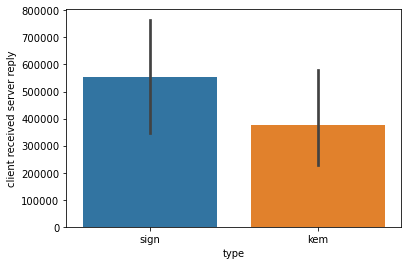

In [52]:
axis = sns.barplot(x = 'type', y = 'client received server reply', data = kssr)

In [69]:
lat36rate10 = kssr.loc[(kssr['rtt'] == 36.688) & (kssr['rate'] == '10mbit')]
lat206rate10 = kssr.loc[(kssr['rtt'] == 206.821) & (kssr['rate'] == '10mbit')]
lat36rate1000 = kssr.loc[(kssr['rtt'] == 36.688) & (kssr['rate'] == '1000mbit') ]
lat206rate1000 = kssr.loc[(kssr['rtt'] == 206.821) & (kssr['rate'] == '1000mbit')]


[Text(0, 0, 'SKSFN36-10'),
 Text(0, 0, 'KKKFR36-10'),
 Text(0, 0, 'KKKFN36-10'),
 Text(0, 0, 'SKSFR36-10')]

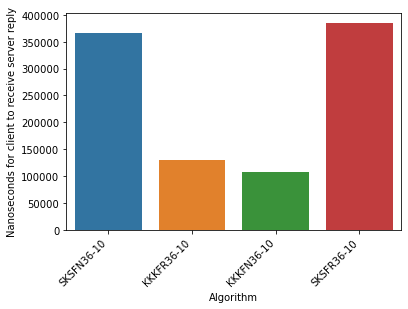

In [67]:
# Plot lat36rate10
axis = sns.barplot(x = 'Algorithm', y = 'client received server reply', data = lat36rate10)
axis.set(ylabel = 'Nanoseconds for client to receive server reply')
axis.set_xticklabels(labels = lat36rate10['Algorithm'], rotation=45, ha='right')

[Text(0, 0, 'SKSFN206-10'),
 Text(0, 0, 'KKKFR206-10'),
 Text(0, 0, 'KKKFN206-10'),
 Text(0, 0, 'SKSFR206-10')]

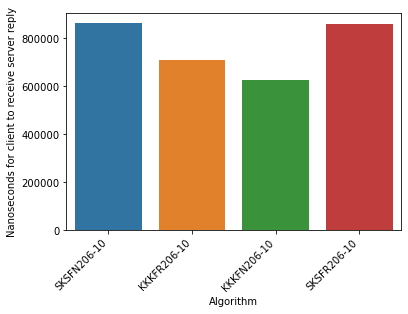

In [70]:
# Plot lat206rate10
axis = sns.barplot(x = 'Algorithm', y = 'client received server reply', data = lat206rate10)
axis.set(ylabel = 'Nanoseconds for client to receive server reply')
axis.set_xticklabels(labels = lat206rate10['Algorithm'], rotation=45, ha='right')

[Text(0, 0, 'SKSFN206-1000'),
 Text(0, 0, 'KKKFR206-1000'),
 Text(0, 0, 'KKKFN206-1000'),
 Text(0, 0, 'SKSFR206-1000')]

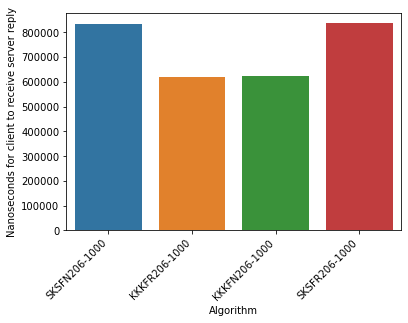

In [71]:
# Plot lat206rate1000
axis = sns.barplot(x = 'Algorithm', y = 'client received server reply', data = lat206rate1000)
axis.set(ylabel = 'Nanoseconds for client to receive server reply')
axis.set_xticklabels(labels = lat206rate1000['Algorithm'], rotation=45, ha='right')

[Text(0, 0, 'SKSFN36-1000'),
 Text(0, 0, 'KKKFR36-1000'),
 Text(0, 0, 'KKKFN36-1000'),
 Text(0, 0, 'SKSFR36-1000')]

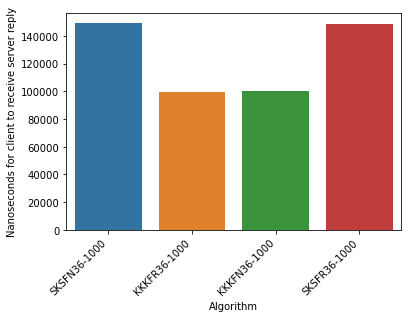

In [72]:
# Plot lat36rate1000
axis = sns.barplot(x = 'Algorithm', y = 'client received server reply', data = lat36rate1000)
axis.set(ylabel = 'Nanoseconds for client to receive server reply')
axis.set_xticklabels(labels = lat36rate1000['Algorithm'], rotation=45, ha='right')